In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [105]:
df = pd.read_csv("used_cars.csv")

In [106]:
df.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [107]:
X = df[['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col']]


In [108]:
X.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black


In [109]:
y = df['price']

In [110]:
X["car_age"] = 2025 - X["model_year"] +1
X["car_age"].head(5)

C:\Users\Learning\AppData\Local\Temp\ipykernel_20084\1886023887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["car_age"] = 2025 - X["model_year"] +1


0    13
1     5
2     4
3    11
4     5
Name: car_age, dtype: int64

In [111]:
X=X.drop(["model_year"],axis=1)


In [112]:
X['milage'] = X['milage'].str[0:-3]
X['milage'] = X['milage'].str.replace(",", "").astype(int)

#ví dụ 43000 mi. thì -3 ỡ m nên cắt đi

In [113]:
X['engine']=X['engine'].str.extract(r"(\d+.\d+)L").astype(float) #regular expression 

In [114]:
X.head()

,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,car_age
0,Ford,Utility Police Interceptor Base,51000,E85 Flex Fuel,3.7,6-Speed A/T,Black,Black,13
1,Hyundai,Palisade SEL,34742,Gasoline,3.8,8-Speed Automatic,Moonlight Cloud,Gray,5
2,Lexus,RX 350 RX 350,22372,Gasoline,NaN,Automatic,Blue,Black,4
3,INFINITI,Q50 Hybrid Sport,88900,Hybrid,3.5,7-Speed A/T,Black,Black,11
4,Audi,Q3 45 S line Premium Plus,9835,Gasoline,2.0,8-Speed Automatic,Glacier White Metallic,Black,5


In [115]:
X = X.dropna()
X.head()

,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,car_age
0,Ford,Utility Police Interceptor Base,51000,E85 Flex Fuel,3.7,6-Speed A/T,Black,Black,13
1,Hyundai,Palisade SEL,34742,Gasoline,3.8,8-Speed Automatic,Moonlight Cloud,Gray,5
3,INFINITI,Q50 Hybrid Sport,88900,Hybrid,3.5,7-Speed A/T,Black,Black,11
4,Audi,Q3 45 S line Premium Plus,9835,Gasoline,2.0,8-Speed Automatic,Glacier White Metallic,Black,5
6,Audi,S3 2.0T Premium Plus,84000,Gasoline,2.0,6-Speed A/T,Blue,Black,9


Xử lý categories template

In [116]:
X['transmission'] = X['transmission'].str.extract(r"(\d+)-S").astype(float)

In [117]:
X.head()

,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,car_age
0,Ford,Utility Police Interceptor Base,51000,E85 Flex Fuel,3.7,6.0,Black,Black,13
1,Hyundai,Palisade SEL,34742,Gasoline,3.8,8.0,Moonlight Cloud,Gray,5
3,INFINITI,Q50 Hybrid Sport,88900,Hybrid,3.5,7.0,Black,Black,11
4,Audi,Q3 45 S line Premium Plus,9835,Gasoline,2.0,8.0,Glacier White Metallic,Black,5
6,Audi,S3 2.0T Premium Plus,84000,Gasoline,2.0,6.0,Blue,Black,9


In [118]:
X.isnull().sum()

brand              0
model              0
milage             0
fuel_type          0
engine             0
transmission    1544
ext_col            0
int_col            0
car_age            0
dtype: int64

In [119]:
X=X.drop(['transmission'],axis=1)

In [120]:
X

,brand,model,milage,fuel_type,engine,ext_col,int_col,car_age
0,Ford,Utility Police Interceptor Base,51000,E85 Flex Fuel,3.7,Black,Black,13
1,Hyundai,Palisade SEL,34742,Gasoline,3.8,Moonlight Cloud,Gray,5
3,INFINITI,Q50 Hybrid Sport,88900,Hybrid,3.5,Black,Black,11
4,Audi,Q3 45 S line Premium Plus,9835,Gasoline,2.0,Glacier White Metallic,Black,5
6,Audi,S3 2.0T Premium Plus,84000,Gasoline,2.0,Blue,Black,9
...,...,...,...,...,...,...,...,...
4003,Mercedes-Benz,E-Class E 300 4MATIC,53705,Gasoline,2.0,Black,Black,8
4004,Bentley,Continental GT Speed,714,Gasoline,6.0,C / C,Hotspur,3
4005,Audi,S4 3.0T Premium Plus,10900,Gasoline,3.0,Black,Black,4
4007,Ford,F-150 Raptor,33000,Gasoline,3.5,Blue,Black,6


In [121]:
unique_values = df["int_col"].unique()
unique_values

array(['Black', 'Gray', 'Ebony.', 'Green', 'Pimento / Ebony', 'Brown',
       'White', '–', 'Beige', 'Jet Black', 'Light Gray', 'Anthracite',
       'Red', 'Nero Ade', 'Blue', 'Charcoal', 'Rioja Red',
       'Canberra Beige/Black', 'Roast', 'Ivory / Ebony',
       'Silk Beige/Black', 'Medium Pewter', 'Ice', 'Black / Express Red',
       'Obsidian Black', 'Ebony', 'Orange', 'Caramel', 'Orchid',
       'Graphite', 'Tan/Ebony', 'Cappuccino', 'Nero', 'Sahara Tan',
       'BLACK', 'Hotspur', 'Blk', 'Black Onyx', 'Nougat Brown',
       'Titan Black', 'Oyster W/Contrast', 'Silver',
       'Macchiato Beige/Black', 'Sand Beige', 'Navy Pier', 'WHITE',
       'Parchment.', 'Sarder Brown', 'Grace White', 'Cloud', 'Espresso',
       'Mesa', 'Whisper Beige', 'Medium Dark Slate', 'Gold',
       'Camel Leather', 'Tupelo', 'Black/Red', 'Parchment', 'Beluga Hide',
       'Charles Blue', 'Global Black', 'Titan Black / Quarzit', 'Mocha',
       'Portland', 'Medium Light Camel', 'Black / Saddle', 'Ash',
  

In [122]:
label_2_idx = {label:idx for idx, label in enumerate(unique_values)}
label_2_idx

{'Black': 0,
 'Gray': 1,
 'Ebony.': 2,
 'Green': 3,
 'Pimento / Ebony': 4,
 'Brown': 5,
 'White': 6,
 '–': 7,
 'Beige': 8,
 'Jet Black': 9,
 'Light Gray': 10,
 'Anthracite': 11,
 'Red': 12,
 'Nero Ade': 13,
 'Blue': 14,
 'Charcoal': 15,
 'Rioja Red': 16,
 'Canberra Beige/Black': 17,
 'Roast': 18,
 'Ivory / Ebony': 19,
 'Silk Beige/Black': 20,
 'Medium Pewter': 21,
 'Ice': 22,
 'Black / Express Red': 23,
 'Obsidian Black': 24,
 'Ebony': 25,
 'Orange': 26,
 'Caramel': 27,
 'Orchid': 28,
 'Graphite': 29,
 'Tan/Ebony': 30,
 'Cappuccino': 31,
 'Nero': 32,
 'Sahara Tan': 33,
 'BLACK': 34,
 'Hotspur': 35,
 'Blk': 36,
 'Black Onyx': 37,
 'Nougat Brown': 38,
 'Titan Black': 39,
 'Oyster W/Contrast': 40,
 'Silver': 41,
 'Macchiato Beige/Black': 42,
 'Sand Beige': 43,
 'Navy Pier': 44,
 'WHITE': 45,
 'Parchment.': 46,
 'Sarder Brown': 47,
 'Grace White': 48,
 'Cloud': 49,
 'Espresso': 50,
 'Mesa': 51,
 'Whisper Beige': 52,
 'Medium Dark Slate': 53,
 'Gold': 54,
 'Camel Leather': 55,
 'Tupelo': 56

In [123]:
for col in ["brand","model","fuel_type","ext_col","int_col"]:
    unique_valuea = df[col].unique() 
    label_2_idx = {label:idx for idx, label in enumerate(unique_valuea)}
    idx_2_label = {idx:label for label , idx in enumerate(unique_valuea)}

    X[col] = X[col].map(label_2_idx)

In [124]:
X.head()

,brand,model,milage,fuel_type,engine,ext_col,int_col,car_age
0,0,0,51000,0,3.7,0,0,13
1,1,1,34742,1,3.8,1,1,5
3,3,3,88900,2,3.5,0,0,11
4,4,4,9835,1,2.0,3,0,5
6,4,6,84000,1,2.0,2,0,9


In [125]:
X_normalized = (X - X.min()) / (X.max() - X.min())
X_normalized

,brand,model,milage,fuel_type,engine,ext_col,int_col,car_age
0,0.000000,0.000000,0.125710,0.0,0.364865,0.000000,0.000000,0.392857
1,0.017857,0.000527,0.085557,0.2,0.378378,0.003145,0.006452,0.107143
3,0.053571,0.001582,0.219313,0.4,0.337838,0.000000,0.000000,0.321429
4,0.071429,0.002110,0.024043,0.2,0.135135,0.009434,0.000000,0.107143
6,0.071429,0.003165,0.207212,0.2,0.135135,0.006289,0.000000,0.250000
...,...,...,...,...,...,...,...,...
4003,0.232143,0.408755,0.132391,0.2,0.135135,0.000000,0.000000,0.214286
4004,0.357143,0.366561,0.001516,0.2,0.675676,1.000000,0.225806,0.035714
4005,0.071429,0.577004,0.026673,0.2,0.270270,0.000000,0.000000,0.071429
4007,0.000000,0.570148,0.081255,0.2,0.337838,0.006289,0.000000,0.142857


In [126]:
X_normalized.describe()

,brand,model,milage,fuel_type,engine,ext_col,int_col,car_age
count,3606.000000,3606.000000,3606.000000,3606.000000,3606.000000,3606.000000,3606.000000,3606.000000
mean,0.269155,0.411213,0.167555,0.227676,0.367031,0.067091,0.042757,0.313812
std,0.211930,0.272156,0.130044,0.141007,0.191938,0.162318,0.116383,0.209822
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.107143,0.183017,0.063425,0.200000,0.202703,0.006289,0.000000,0.142857
50%,0.232143,0.372363,0.140821,0.200000,0.337838,0.025157,0.000000,0.285714
75%,0.428571,0.615902,0.240995,0.200000,0.500000,0.028302,0.051613,0.428571
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [127]:
y= y.str[1:]
y= y.str.replace(",", "").astype(int)

In [128]:
y

0        10300
1        38005
2        54598
3        15500
4        34999
         ...  
4004    349950
4005     53900
4006     90998
4007     62999
4008     40000
Name: price, Length: 4009, dtype: int32

In [129]:
y_normalized = (y - y.min()) / (y.max() - y.min())

In [130]:
y_normalized

0       0.002812
1       0.012196
2       0.017817
3       0.004573
4       0.011178
          ...   
4004    0.117866
4005    0.017581
4006    0.030148
4007    0.020663
4008    0.012872
Name: price, Length: 4009, dtype: float64

In [131]:
TRAIN_RATIO = 0.8
TEST_RATIO = 0.2

In [132]:
X_train = X_normalized[:int(TRAIN_RATIO * len(X_normalized))]
X_test = X_normalized[int(TRAIN_RATIO * len(X_normalized)):]
y_train = y_normalized[:int(TRAIN_RATIO * len(y_normalized))]
y_test = y_normalized[int(TRAIN_RATIO * len(y_normalized)):]

In [133]:
train_examples = list(zip(X_train.values, y_train.values))
test_examples = list(zip(X_test.values, y_test.values))

MODEL

In [134]:
# --- Add bias term to feature vector ---
def phi(x):
    return np.append(x, 1)  # x -> [x1, x2, ..., xn, 1]

# --- Initialize weight vector (with bias term) ---
def initialWeightVector():
    return np.zeros(X.shape[1] + 1)  # one extra for bias

# --- Mean Squared Error Loss ---
def trainloss(w):
    return (1.0 / len(train_examples)) * sum((w.dot(phi(x_i)) - y_i)**2 for x_i, y_i in train_examples)

# --- Gradient of Loss ---
def gradientTrainloss(w):
    return (1.0 / len(train_examples)) * sum(2 * (w.dot(phi(x_i)) - y_i) * phi(x_i) for x_i, y_i in train_examples)

# --- Gradient Descent ---
def gradientDescent(L, gradientL, initialWeightVector, eta=0.01, max_iters=2000, step=200):
    w = initialWeightVector()
    history = []

    for i in range(max_iters):
        value = L(w)
        gradient = gradientL(w)
        w_new = w - eta * gradient
        history.append(value)

        if i % step == 0:
            grad_norm = np.linalg.norm(gradient)
            print(f"Epoch {i}: Weight Vector = {w}, TrainLoss = {value:.6f}, Gradient Norm = {grad_norm:.6f}")

        w = w_new

    return w, history

In [135]:
w, history = gradientDescent(trainloss, gradientTrainloss, initialWeightVector, eta=0.001, max_iters=2000, step=200)

Epoch 0: Weight Vector = [0. 0. 0. 0. 0. 0. 0. 0. 0.], TrainLoss = 0.001017, Gradient Norm = 0.036455
Epoch 200: Weight Vector = [0.00128563 0.00154338 0.00071669 0.0009988  0.00151862 0.00025174
 0.00018385 0.00139924 0.00444418], TrainLoss = 0.000864, Gradient Norm = 0.019648
Epoch 400: Weight Vector = [0.0020119  0.00231307 0.00108827 0.00153859 0.00227618 0.00037833
 0.00027691 0.0021454  0.00687857], TrainLoss = 0.000820, Gradient Norm = 0.010619
Epoch 600: Weight Vector = [0.00243649 0.0026674  0.00127423 0.00183114 0.00262466 0.00043755
 0.00032111 0.00254019 0.00823047], TrainLoss = 0.000806, Gradient Norm = 0.005792
Epoch 800: Weight Vector = [0.00269813 0.00279924 0.0013604  0.00199045 0.00275353 0.00046051
 0.00033902 0.00274602 0.00899908], TrainLoss = 0.000803, Gradient Norm = 0.003250
Epoch 1000: Weight Vector = [0.0028715  0.0028124  0.001393   0.0020779  0.00276478 0.00046395
 0.00034278 0.00285029 0.00945314], TrainLoss = 0.000801, Gradient Norm = 0.001970
Epoch 1200: 

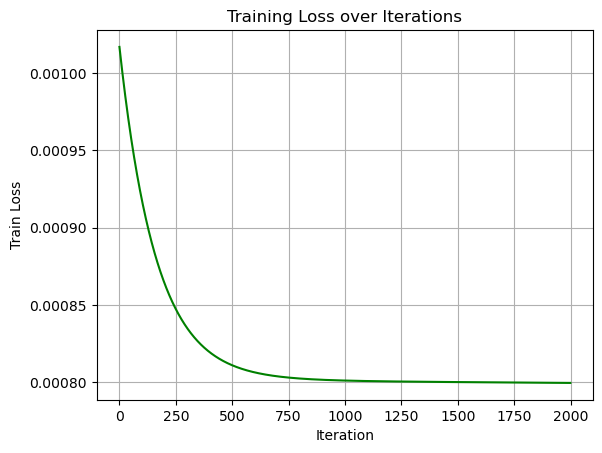

In [136]:
# Plot loss over iterations
plt.plot(history, color='green')
plt.xlabel('Iteration')
plt.ylabel('Train Loss')
plt.title('Training Loss over Iterations')
plt.grid(True)
plt.show()

In [137]:
car_test = X_test.iloc[500]
print(car_test)

brand        0.107143
model        0.200422
milage       0.093603
fuel_type    0.200000
engine       0.270270
ext_col      0.025157
int_col      0.000000
car_age      0.214286
Name: 3769, dtype: float64


In [138]:
real_price = y_test.iloc[500]
print(real_price)

0.04569654714992769


In [139]:
real_price_denormalized = real_price.item() * (y.max() - y.min()) + y.min()
print(f"Real price: ${real_price_denormalized:.2f}")

Real price: $136900.00


In [140]:
# Predict
price = w[:-1] @ car_test + w[-1]
price_denormalized = price * (y.max() - y.min()) + y.min()
print(f"Predicted price for a car is: ${price_denormalized:.2f}")

Predicted price for a car is: $40179.73
